# **Relatório de Comparação de Algoritmos**

*Supercomputação*

Luís Filipe Loureiro e Murilo Lima

Gerando as entradas  com tamanho 10 a 2000

In [4]:
import random
max = 10001
def Seq_Gen(n):
    file = 'entries/dna.seq' + str(n)
    f = open(file, 'w')
    seq=[str(n)+'\n',
     str(n)+'\n',
     ''.join(random.choices(['A','T','C','G','-'],k=n))+'\n',
     ''.join(random.choices(['A','T','C','G','-'],k=n))]
    f.writelines(seq)
    f.close()

i = 10
while i <max:
  Seq_Gen(i)
  i+=50



**Criação de um ambiente para .cpp**

In [5]:
!git config --global url."https://".insteadOf git://

In [4]:
#configurando o colab
!pip install git+git://github.com/andreinechaev/nvcc4jupyter.git
!pip install git+git://github.com/canesche/nvcc4jupyter.git
!git clone https://github.com/canesche/nvcc4jupyter
%load_ext nvcc_plugin

  Cloning git://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-sef4j4uj
  Running command git clone -q git://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-sef4j4uj
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4306 sha256=9fd14506ceaa19ec023ce3a5666f51fe20ebc7d618f43d91ae903f8ddbcd64ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-q7t4zob8/wheels/c5/2b/c0/87008e795a14bbcdfc7c846a00d06981916331eb980b6c8bdf
Successfully built NVCCPlugin
  Cloning git://github.com/canesche/nvcc4jupyter.git to /tmp/pip-req-build-szigwnvg
  Running command git clone -q git://github.com/canesche/nvcc4jupyter.git /tmp/pip-req-build-szigwnvg
  Created wheel for ColabPlugin: filename=ColabPlugin-blind-py3-none-any.whl size=12727 sha256=afb1e9d276f83f5695994c1ef5b931178389866991765728de32121a0e4d3b2a
  Stored in directory: /tmp/pip-ephem-wheel-cache-mrbqpbxi/wheels/97/a0/61/b9e5e1f61c5cfd624df291d57f6731a0f5832606b9ced448ef
Failed to build Col

A partir do código dos três algoritos, será criado seus respectivos executáveis

# **Algoritmos**

Para todos os algoritmos o padrão adotado para comparação de cada letra das sequências foi o mesmo.

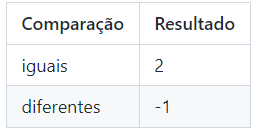

# **Smith Waterman Algorithm - Heurística**


Sobre o algoritmo:


A Heurística de Alinhamento Local de Smith-Waterman tem como objetivo maximizar o alinhamento entre duas sequências (inputs). Para tanto, definimos como padrão de score um 2 quando as letra é correspondente e -1 quando há mismatch ou gap.

A construção da matriz foi feita seguindo seu algoritmo, de acordo com o pseudo-código:

Calcular diagonal = H[i-1,j-1] + w(a[i],b[j]), onde w(a[i],b[j])=2 se houve match, w(a[i],b[j])= -1 se houve mismatch e w(a[i],b[j])= -1 se houve gap

No mesmo for que construímos a matriz Smith-Waterman, nós também realizamos a construção de uma segunda Matriz, a Route. Ela tem como objetivo mapear as direções realizadas de acordo com qual valor a matriz original recebeu. Ou seja:
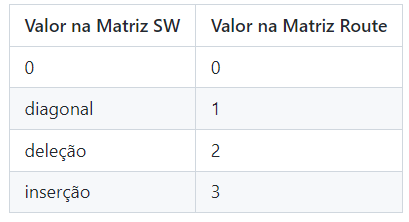

Com a Route construída, foi realizado a identificação do valor máximo na Matriz SW e sua respectiva posição. A partir dele, foi seguido o caminho que maximizava alinhamento,- de acordo com os valores na Route - retornando as sequências como output.

*Código:*

In [6]:
%%writefile heuristica.cpp 
#include <algorithm>
#include<vector>
#include <iostream>
#include <tuple>

using namespace std;

typedef vector<vector<int>> matrix;

int calcula_valor(char a, char b){
    if(a==b){
        return 2;
    }else{
        return -1;
    }
}


vector<int> findMax_matrix(matrix H, int n, int m){
	
    vector<int> result;
    int matrix_max = 0;
	int i_max=0, j_max=0;
	for(int i=0;i<=n;i++)
	{
		for(int j=0;j<=m;j++)
		{
			if(H[i][j]>matrix_max)
			{
				matrix_max = H[i][j];
				i_max=i;
				j_max=j;
			}
		}
	}
    result.push_back(matrix_max);
    result.push_back(i_max);
    result.push_back(j_max);
    return result;
        
}

void printador(matrix H, int n, int m){

    for (int i = 0; i <= n; i++){
        for (int j = 0; j <= m; j++){
            cout << H[i][j] << "  ";
        }
        cout << endl;
    }
}

tuple<string, string> RouteTracer(matrix Route, int i_max,int j_max, string a, string b){

    int maxValue = Route[i_max][j_max];
    int currentValue = maxValue;
    int current_i = i_max;
    int current_j = j_max;
    string SeqA = "";
    string SeqB = "";

    while(currentValue != 0){

        if(currentValue == 1){

            SeqA += a[current_i];
            SeqB += b[current_j];

            current_i = current_i - 1;
            current_j = current_j - 1;
            currentValue = Route[current_i][current_j];

        } else if(currentValue == 2){

            SeqA += a[current_i];
            SeqB += "-";

            current_i -= 1;
            currentValue = Route[current_i][current_j];

        }else if(currentValue == 3){

            SeqA += "-";
            SeqB += b[current_j];

            current_j -= 1;
            currentValue = Route[current_i][current_j];


        }
    }

    reverse(SeqA.begin(), SeqA.end());
    reverse(SeqB.begin(), SeqB.end());

    return make_tuple(SeqA, SeqB);

}

tuple<matrix, matrix> Heuristica_SW(matrix H, int n, int m, string a, string b, matrix Route){
    int del, diag, ins, candidato,w;
    


    for(int i = 1; i <= n; i++){
        for(int j = 1; j <= m; j++){

            w = calcula_valor(a[i],b[j]);
            diag = H[i-1][j-1] + w;
            
            del = H[i-1][j] - 1;

            ins = H[i][j-1] - 1;

            candidato = max({0,diag,del,ins});
            H[i][j] = candidato;

            if(H[i][j] == 0 ){

                Route[i][j] = 0;

            } else if(H[i][j] == diag){

                Route[i][j] = 1;

            }else if(H[i][j] == del){

                Route[i][j] = 2;

            }else if(H[i][j] == ins){

                Route[i][j] = 3;
            }
        }
    }
   
    return make_tuple(H, Route);
}


int main(){

    int n, m;    
    string a_OLD, b_OLD;

    cout << "Size Sequence A" << endl;
    cin >> n;
    cout << "Size Sequence B" << endl;
    cin >> m;
    cout << "Sequence A" << endl;
    cin >> a_OLD;
    cout << "Sequence B" << endl;
    cin >> b_OLD;

    cout << "You typed in " << endl << a_OLD << endl << b_OLD << endl;

    // Criação da moldura
    string a = "#" + a_OLD;
    string b = "#" + b_OLD;

    // cout << a << endl << b << endl;

  
    // Matrix Init
    matrix H;
    H.resize(n+1);
    for(int zero = 0; zero <=n; zero++){
        H[zero].resize(m+1);
    }

    matrix Route;
    Route.resize(n+1);
    for(int zero = 0; zero <=n; zero++){

        Route[zero].resize(m+1);
    }
  

    tie(H, Route) = Heuristica_SW(H,n,m,a,b, Route);
    cout << "Matrix" << endl;
    printador(H,n,m);
    cout << "" << endl;
    //cout << "Matrix Route" << endl;
    //printador(Route,n,m);
    
    int matrix_max,i_max, j_max;
    
    vector<int>  MAXs;
    MAXs = findMax_matrix( H, n, m);

    matrix_max = MAXs[0];
    i_max = MAXs[1];
    j_max = MAXs[2];



    cout << "" << endl;
    cout << "Score: " << matrix_max << endl;
    cout << "" << endl;
    cout << "i max: " << i_max << endl;
    cout << "" << endl;
    cout << "j max: " << j_max << endl;

    string SeqA,SeqB;

	tie(SeqA,SeqB) = RouteTracer(Route,i_max,j_max,a,b);

    cout << "Sequencias que maximizam o score: " << endl;
    cout << "SeqA: " << SeqA << endl;
    cout << "SeqB: " << SeqB << endl;
    cout << "EOF";
    
    return 0;

}

// Referências:
// [1] - http://web.tecnico.ulisboa.pt/ana.freitas/bioinformatics.ath.cx/bioinformatics.ath.cx/index2568.html?id=49#:~:text=Alinhamento%20Local%20%2D%20Smith%2DWaterman,em%20todo%20o%20seu%20comprimento
// [2] - https://github.com/ngopal/SimpleSmithWatermanCPP/blob/master/SmithWaterman.cpp
// [3] - //https://codereview.stackexchange.com/questions/26100/maximum-of-three-values-in-c
// [4] - https://www.geeksforgeeks.org/reverse-a-string-in-c-cpp-different-methods/


Writing heuristica.cpp


In [7]:
!g++ -O3 heuristica.cpp -o heuristica

# **Alinhamento por Busca Local - Aleatorização**

*Sobre o algoritmo:*

O algoritmo foi construído com base na aleatoriedade. Para tanto, foi baseado no gerador randômico do cpp.

Após o recebimento das entradas: tamanhos e as prórpias strings de DNA (seqA e seqB) é criado um número randômico int k. Ele representa o tamanho da substring que será recortado da seqB. Ou seja, é respeitado a ordem da string, sendo apenas realizado um recorte do início até k. Importante salientar que foi definido que o tamanho máximo de k é o tamanho de seqA.

Em seguida, é gerado um segundo valor aleatório, int p. Esse é o número de substrings que serão criados a partir da seqA, com tamanho k. Para tanto, os recortes foram iniciados no início de seqA e vão de um e um.

Por fim, é comparado as substrings de seqA com seqB. Indentificando, assim, a substring de A que tinha seu valor total maximizado.


*Código:*

In [8]:
%%writefile local.cpp 
#include <iostream>
#include<random>

using namespace std;

int calcula_valor(char a, char b){
    if(a==b){
        return 2;
    }else{
        return -1;
    }
}

string ale_substring(int n, string seq){

    default_random_engine generator(102);
    uniform_real_distribution<double> distribution(1, n);


    int k = distribution(generator); //valor aleatorio para seqB
    string SeqB_Part = seq.substr (0,k);
    return SeqB_Part;

}

int calculadora(string seqA, string seqB){
  int valor = 0;
  int contador = seqA.size();
  for (int i = 0; i < contador; i++){
    valor += calcula_valor(seqA[i], seqB[i]);
  }
  return valor;
}

int main()
{

    int n, m;    
    string SeqA, SeqB;

    cout << "Size Sequence A" << endl;
    cin >> n;
    cout << "Size Sequence B" << endl;
    cin >> m;
    cout << "Sequence A" << endl;
    cin >> SeqA;
    cout << "Sequence B" << endl;
    cin >> SeqB;


    string SeqB_Part = ale_substring(n,SeqB);
    

    cout << "Value of k:" << endl;
    int k = SeqB_Part.size();
    cout <<k<< endl;
    cout << "Substring Sequence B:" << endl;
    cout << SeqB_Part << endl;

    default_random_engine generator(101);
    uniform_real_distribution<double> distribution(1, 5);
    int p = distribution(generator); //numero de subsequencias de seqA
    cout << "Num of substrings SeqA:" << endl;
    cout <<p<< endl;

    vector<string> subSeqA;

    for(int i = 0; i < p; i++){
        
        string A = SeqA.substr (i,k);
        //cout << "Substrings of seqA:"<< endl;
        //cout << A << endl;
        subSeqA.push_back(A);
        
    }

    int candidato, match, id;

    for(int j=0; j<subSeqA.size();j++){
        candidato = calculadora(subSeqA[j], SeqB_Part);
        if(j==0){
            match = candidato;
            id = j;
        }else if(candidato>match){
            match = candidato;
            id = j;
        }       
        
}

    cout << "Resultados Finais:"<< endl;
    cout << "Match Max:"<< endl;
    cout << match << endl;
    cout << "Substrings que maximizaram o match:"<< endl;
    cout << "Seq A:"<< endl;
    cout << subSeqA[id] << endl;
    cout << "Seq B:"<< endl;
    cout << SeqB_Part << endl;

    cout << ""<< endl;
    cout << "EOF"<< endl;    

    return 0;
}


Writing local.cpp


In [9]:
!g++ -O3 local.cpp -o local

# **Algoritmo de Força Exaustiva - Brute Force**

*Sobre o algoritmo:*

O algoritmo de força exaustiva é baseado na ideia de geração de todas as subsequências possíveis a partir das entradas SeqA e SeqB.

As substrings são então armazenadas em uma lista. Em seguida, é realizado a comparação e o cálculo do score entre apenas **as subsequências de mesmo tamanho**.

Assim, tendo todas as comparações e os respectivos *scores*, seleciona-se o *score* máximo e suas respectivas entradas. Ou seja, aquelas com maior grau de similaridade.

Importante ressaltar que, seguindo a rubrica e a proposta de criação do algoritmo, uma segunda possibilidade seria também realizar o cálculo do score para aquelas sequências de tamanho diferentes. Para tanto, bastaria utilizar o algoritmo Smith Waterman. Entretanto, foi escolhido outro caminho, pois tal proposta aumentaria consideravelmente o tempo de execução do algoritmo. 

*Código:*

In [10]:
%%writefile exaustiva.cpp 
#include <iostream>
#include<random>
#include <algorithm>

using namespace std;

int calcula_valor(char a, char b){
    if(a==b){
        return 2;
    }else{
        return -1;
    }
}



// https://stackoverflow.com/questions/15726641/find-all-possible-substring-in-fastest-way
vector<string> subs_generator(string DNA, int size){
    vector<string> lista_subs;
    
    for(int i = 0; i < size; i++){
        for(int j = i + 1; j < size; j++){

            string x = DNA.substr(i,j);           
            lista_subs.push_back(x);
            
        }
        
        lista_subs.push_back(DNA);
        
    }
    return lista_subs;
}

int calculadora(string seqA, string seqB){
  int valor = 0;
  int contador = seqA.size();
  for (int i = 0; i < contador; i++){
    valor += calcula_valor(seqA[i], seqB[i]);
  }
  return valor;
}

int main()
{

    int n, m;    
    string SeqA, SeqB;

    cout << "Size Sequence A" << endl;
    cin >> n;
    cout << "Size Sequence B" << endl;
    cin >> m;
    cout << "Sequence A" << endl;
    cin >> SeqA;
    cout << "Sequence B" << endl;
    cin >> SeqB;

    vector<string> all_SeqA;
    vector<string> all_SeqB;

    int max;

    if(n>m){
        max = m;
    }else{
        max = n;
    }

    all_SeqA = subs_generator(SeqA, n);
    all_SeqB = subs_generator(SeqB, m);


    int cand_SeqA, cand_SeqB, match, id, contador, candidato;
    string finalSeqA, finalSeqB; 
    contador = 0;
    cand_SeqA = 0;
    cand_SeqB = 0;
   



    // Removing duplicated SeqA
    std::sort(all_SeqA.begin(), all_SeqA.end());
    all_SeqA.erase(std::unique(all_SeqA.begin(), all_SeqA.end()), all_SeqA.end());

    // Removing duplicated SeqB
    std::sort(all_SeqB.begin(), all_SeqB.end());
    all_SeqB.erase(std::unique(all_SeqB.begin(), all_SeqB.end()), all_SeqB.end());


    for (string i: all_SeqA){
        for (string j: all_SeqB){

            if(i.size() == j.size()){
                candidato = calculadora(i,j);
                if(contador == 0){
                    match = candidato;
                    finalSeqA = i;
                    finalSeqB = j;

                }else if(candidato>match){
                    match = candidato;
                    finalSeqA = i;
                    finalSeqB = j;

                }
            }
            contador ++;
                
            }
        
        
    }
    

    

    cout << "Resultados Finais:"<< endl;
    cout << "Match Max:"<< endl;
    cout << match << endl;
    cout << "Substrings que maximizaram o match:"<< endl;
    cout << "Seq A:"<< endl;
    cout << finalSeqA << endl;
    cout << "Seq B:"<< endl;
    cout << finalSeqB << endl;

    cout << ""<< endl;
    cout << "EOF"<< endl;    

    return 0;
}


Writing exaustiva.cpp


In [11]:
!g++ -O3 exaustiva.cpp -o exaustiva

#Análise de Tempo - Algoritmos

In [16]:
# Criando uma lista com entradas ordenadas e seus respectivos tamanhos

import subprocess
import time
import os
import matplotlib.pyplot as plt 
directory = 'entries'
entries = []
size_entries = []
i =10
while i < max:

  for filename in os.listdir(directory):

    if filename == "dna.seq" + str(i):
      f = os.path.join(directory, filename)
      # checking if it is a file
      if os.path.isfile(f):
        entries.append(f)
  i+=50

i =10        
while i < max:
  size_entries.append(i)
  i+=50

In [17]:
# Funções para multiplas execuções (em for)

def roda_com_entrada(executavel, arquivo_in):
    with open(arquivo_in) as f:
        start = time.perf_counter()
        proc = subprocess.run(['./' + executavel], input=f.read(), text=True, capture_output=True)
        print(arquivo_in)
        end = time.perf_counter()        
        time1 = end - start  
        print(time1)     
    
    return (time1)

def multiplas_rodagens(executavel, lista_entradas):
    tempos = []
    for i in lista_entradas:
        tempo = roda_com_entrada(executavel,i)
        tempos.append(tempo)
        if tempo > 670:
          return tempos
    return tempos


In [18]:
tempos_heuristica = []
tempos_local = []
tempos_exaustiva = []

tempos_heuristica = multiplas_rodagens("heuristica", entries)

entries/dna.seq10
0.013276343000029556
entries/dna.seq60
0.0061912329999813664
entries/dna.seq110
0.007273748999978125
entries/dna.seq160
0.012197222999986934
entries/dna.seq210
0.014974281999968753
entries/dna.seq260
0.019723928000018986
entries/dna.seq310
0.025583791000030942
entries/dna.seq360
0.03434686600002124
entries/dna.seq410
0.040623260000018035
entries/dna.seq460
0.05160220600004095
entries/dna.seq510
0.06002877700001363
entries/dna.seq560
0.07895637100000386
entries/dna.seq610
0.09022772800000212
entries/dna.seq660
0.09308210400001826
entries/dna.seq710
0.1128552020000484
entries/dna.seq760
0.11475752399996964
entries/dna.seq810
0.13753934900000786
entries/dna.seq860
0.14615699199998744
entries/dna.seq910
0.16152257599998165
entries/dna.seq960
0.17937908400000424
entries/dna.seq1010
0.19479760800004442
entries/dna.seq1060
0.20730618099997855
entries/dna.seq1110
0.24787009800002124
entries/dna.seq1160
0.2664070999999808
entries/dna.seq1210
0.2812039860000368
entries/dna.seq1

In [19]:
tempos_local = multiplas_rodagens("local", entries)

entries/dna.seq10
0.05687341899988496
entries/dna.seq60
0.04089148799994291
entries/dna.seq110
0.04398159199990914
entries/dna.seq160
0.04408482799999547
entries/dna.seq210
0.039624628999945344
entries/dna.seq260
0.04249431099992762
entries/dna.seq310
0.043410451999989164
entries/dna.seq360
0.04450418799979161
entries/dna.seq410
0.052022904999830644
entries/dna.seq460
0.03918487600003573
entries/dna.seq510
0.0449922840000454
entries/dna.seq560
0.042708946000175274
entries/dna.seq610
0.03947732200003884
entries/dna.seq660
0.044970149999926434
entries/dna.seq710
0.038821022999854904
entries/dna.seq760
0.04407365600013691
entries/dna.seq810
0.04705407500000547
entries/dna.seq860
0.038717227999995885
entries/dna.seq910
0.03919469900006334
entries/dna.seq960
0.039326577999872825
entries/dna.seq1010
0.044188954999981434
entries/dna.seq1060
0.04037623900012477
entries/dna.seq1110
0.044256131999873105
entries/dna.seq1160
0.0414047379999829
entries/dna.seq1210
0.04172980800012738
entries/dna.se

Após mais de 1 hora rodando, o algoritmo de busca exaustiva travou no 686.52 segundos com um tamanho de 710 do DNA. Sendo, portanto, esse seu limite máximo de tamanho de entrada

In [20]:
tempos_exaustiva = multiplas_rodagens("exaustiva", entries)

entries/dna.seq10
0.055480348999935813
entries/dna.seq60
0.06322419999992235
entries/dna.seq110
0.25328187299987803
entries/dna.seq160
1.025757719000012
entries/dna.seq210
2.9513545540000905
entries/dna.seq260
6.934592400000156
entries/dna.seq310
15.156719190000103
entries/dna.seq360
26.825533131000157
entries/dna.seq410
47.43579568799987
entries/dna.seq460
79.83407994499998
entries/dna.seq510
122.96929028100021
entries/dna.seq560
181.38751993799997
entries/dna.seq610
281.26728950200004
entries/dna.seq660
441.04891643300016
entries/dna.seq710
704.3147485680001


In [34]:
size_entries_exaustiva = []
e = 10
for i in range(0,len(tempos_exaustiva)):
  size_entries_exaustiva.append(e)
  e+=50



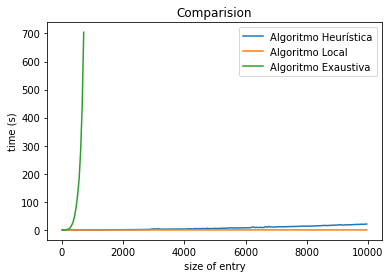

In [35]:
plt.plot( size_entries, tempos_heuristica,  label = "Algoritmo Heurística")
plt.plot(size_entries, tempos_local, label = "Algoritmo Local")
plt.plot(size_entries_exaustiva, tempos_exaustiva, label = "Algoritmo Exaustiva")


plt.ylabel('time (s)')
plt.xlabel('size of entry')
 

plt.legend()
plt.title('Comparision')
plt.show()

Como esperado o tempo o tempo de processamento do Algoritmo de Busca Exaustiva escala bem mais rapidamente que os demais. Inclusive, a partir do teste de tamanho da sequência de DNA até 10 mil letras, foi o único dos três a falhar.

Isso se deve ao fato de ser realizado a criação de **todas** as substrings possíveis de ambas as sequências, assim, o aumento nas entradas impacta significamente o tempo de processamento. Interessante notar que o código ficaria substancialmente mais lento caso se tivesse adicionado a comparação entre substrings de tamanhos distintos, uma vez que não só o número de comparações aumentaria como para cada uma seria utilizado o Algoritmo de Smith Waterman.

Ademais, o Algoritmo da Heuristica ficou em posição intermediária, entretanto, mostrou-se consideravalmente mais lento que o local. Isso se deve pois é realizado a construção de duas matrizes - a de cálculo e a Route como previamente apresentado - assim, o tamanho da entrada aumentará o tempo dos loops que percorrem ambas as matrizes. Interessante notar, entretanto, que a diferença apenas se acentua com tamanhos grandes de entrada (> 8000).

Por fim, o local foi o algoritmo mais eficiente na análise temporal. Por se basear na aleatoriedade, o aumento no tamanho das entradas tem um impacto menor, pois a substring utilizada para cálculo tem tamanho aleatório.

# Análise & Profiling

In [38]:
!apt-get install valgrind

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  gdb gdbserver libbabeltrace1 libc6-dbg libdw1
Suggested packages:
  gdb-doc valgrind-dbg valgrind-mpi kcachegrind alleyoop valkyrie
The following NEW packages will be installed:
  gdb gdbserver libbabeltrace1 libc6-dbg libdw1 valgrind
0 upgraded, 6 newly installed, 0 to remove and 42 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 126 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libdw1 amd64 0.170-0.4ubuntu0.1 [203 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libbabeltrace1 amd64 1.5.5-1 [154 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 gdb amd64 8.1.1-0ub

In [42]:
!valgrind --tool=callgrind ./heuristica <entries/dna.seq10


==1606== Callgrind, a call-graph generating cache profiler
==1606== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1606== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==1606== Command: ./heuristica
==1606== 
==1606== For interactive control, run 'callgrind_control -h'.
==1606== brk segment overflow in thread #1: can't grow to 0x4a2c000
==1606== (see section Limitations in user manual)
==1606== NOTE: further instances of this message will not be shown
Size Sequence A
Size Sequence B
Sequence A
Sequence B
You typed in 
GG-CGTCTGA
C-C-ATAAGG
Matrix
0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  2  2  
0  0  0  0  0  0  0  0  0  2  4  
0  0  2  1  2  1  0  0  0  1  3  
0  2  1  4  3  2  1  0  0  0  2  
0  1  1  3  3  2  1  0  0  2  2  
0  0  0  2  2  2  4  3  2  1  1  
0  2  1  2  1  1  3  3  2  1  0  
0  1  1  1  1  0  3  2  2  1  0  
0  0  0  0  0  0  2  2  1  4  3  
0  0  0  0  0  2  1  4  4  3  3  


Score: 4

i max: 2

j max:

In [43]:
!callgrind_annotate callgrind.out.1606 heuristica.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1606' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 829421
Trigger: Program termination
Profiled target:  ./heuristica (PID 1606, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   heuristica.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
       Ir 
--------------------------------------------------------------------------------
3,980,039  PROGRAM TOTALS

--------------------------------------------------------------------------------
       Ir  file:function
--------------------------------------------------------------------------------
1,031,087  /build/glibc-uZu3wS/glibc-2.27/elf/dl-lookup.c:_dl_lookup_symbol_x [

In [44]:
!valgrind --tool=callgrind ./local <entries/dna.seq10

==1622== Callgrind, a call-graph generating cache profiler
==1622== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1622== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==1622== Command: ./local
==1622== 
==1622== For interactive control, run 'callgrind_control -h'.
==1622== brk segment overflow in thread #1: can't grow to 0x4a2c000
==1622== (see section Limitations in user manual)
==1622== NOTE: further instances of this message will not be shown
Size Sequence A
Size Sequence B
Sequence A
Sequence B
Value of k:
4
Substring Sequence B:
C-C-
Num of substrings SeqA:
2
Resultados Finais:
Match Max:
2
Substrings que maximizaram o match:
Seq A:
G-CG
Seq B:
C-C-

EOF
==1622== 
==1622== Events    : Ir
==1622== Collected : 3840982
==1622== 
==1622== I   refs:      3,840,982


In [45]:
!callgrind_annotate callgrind.out.1622 local.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1622' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 801649
Trigger: Program termination
Profiled target:  ./local (PID 1622, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   local.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
       Ir 
--------------------------------------------------------------------------------
3,840,982  PROGRAM TOTALS

--------------------------------------------------------------------------------
       Ir  file:function
--------------------------------------------------------------------------------
1,025,649  /build/glibc-uZu3wS/glibc-2.27/elf/dl-lookup.c:_dl_lookup_symbol_x [/lib/x86_6

In [46]:
!valgrind --tool=callgrind ./exaustiva <entries/dna.seq10

==1634== Callgrind, a call-graph generating cache profiler
==1634== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==1634== Using Valgrind-3.13.0 and LibVEX; rerun with -h for copyright info
==1634== Command: ./exaustiva
==1634== 
==1634== For interactive control, run 'callgrind_control -h'.
==1634== brk segment overflow in thread #1: can't grow to 0x4a2c000
==1634== (see section Limitations in user manual)
==1634== NOTE: further instances of this message will not be shown
Size Sequence A
Size Sequence B
Sequence A
Sequence B
Resultados Finais:
Match Max:
4
Substrings que maximizaram o match:
Seq A:
GG
Seq B:
GG

EOF
==1634== 
==1634== Events    : Ir
==1634== Collected : 4009788
==1634== 
==1634== I   refs:      4,009,788


In [47]:
!callgrind_annotate callgrind.out.1634 exaustiva.cpp 

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.1634' (creator: callgrind-3.13.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 850447
Trigger: Program termination
Profiled target:  ./exaustiva (PID 1634, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   exaustiva.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
       Ir 
--------------------------------------------------------------------------------
4,009,788  PROGRAM TOTALS

--------------------------------------------------------------------------------
       Ir  file:function
--------------------------------------------------------------------------------
1,027,044  /build/glibc-uZu3wS/glibc-2.27/elf/dl-lookup.c:_dl_lookup_symbol_x [/l

O profilling evidencia que o número de eventos ocorridos na Busca Exaustiva é um pouco a cima de 4 milhões, valor superior tanto ao Local como a Heurística.


O principal ponto de lentidão na Busca Exaustiva é justamente a geração e comparação de todas as substrings possíveis a partir de ambas as sequências de DNA.

No caso da Heurística, o principal ponto recai nos loops das matrizes. Assim, haveria uma oportunidade de otimização. Seria possível construir uma matriz com uma struct que contém o valor e coordenada. Dessa maneira, seria percorrido apenas 1 matriz.

Por fim, no caso da Local, a lentidão está na comparação letra-a-letra das sequências de DNA. Importante ressaltar, entretanto, que o tamanho da substring é aleatório, mas dado entradas maiores, aumenta-se a probabilidade de substrings com maior número de letras evidentemente.

In [49]:
print("EOF")

EOF
